<a href="https://colab.research.google.com/github/ayushi15092002/mental-health-workload/blob/main/spectral_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [ ]:
pip install mne --upgrade

In [ ]:
pip install signal-processing

In [ ]:
pip install basic

In [ ]:
pip install sklearn.cross_validation

In [50]:
pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 8.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [51]:
import os, mne
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from signal_processing import *
# from basic import *
from scipy.signal import welch
from scipy.integrate import simps
from mne.time_frequency import psd_array_multitaper 

In [8]:
b_names = ['Delta','Theta','Alpha','Beta']
b_freqs = [[1,3.9],[4,7.9],[8,12],[12.1,30]]
brain_regions = {'Left frontal':['AF3','F7','F3'],
                 'Right frontal':['AF4','F8','F4'],
                 'Left posterior':['CP5','P7','P3'],
                 'Right posterior':['CP6','P8','P4'],
                 'Midline frontal':['Fz'],
                 'Midline central':['Cz'],
                 'Midline posterior':['Pz']}

<ipython-input-46-31e9fb321698>:3: RuntimeWarning: This filename (/content/drive/My Drive/drdo/cleanData/VP004/nback1.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(fname=file_path,verbose=False)


epochs >>>>>>>>>>>>>>>>>>>>>>


<string>:4: FutureWarning: NOTE: psd_welch() is a deprecated function. Function ``psd_welch()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="welch")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.


psds >>>>>>>>>>>>>>>>>>>>>
[[[2.21533204e+01 8.17893364e+00 4.18525992e+00 ... 3.34371885e-02
   3.35939472e-02 2.79535276e-02]
  [5.74676290e+01 2.15683497e+01 9.35461897e+00 ... 5.86498932e-02
   4.83976108e-02 5.22858887e-02]
  [3.72700890e+01 1.27231550e+01 8.61695997e+00 ... 3.65750321e-02
   3.76784318e-02 2.80222834e-02]
  ...
  [3.09564570e+01 5.98726613e+00 2.61181401e+00 ... 4.70442177e-02
   4.25175900e-02 3.67901615e-02]
  [3.70916065e+01 7.77589947e+00 2.93303777e+00 ... 7.02982885e-02
   5.43431505e-02 5.24598424e-02]
  [2.96591031e+01 8.15341179e+00 3.86076101e+00 ... 7.53632700e-02
   6.56445619e-02 6.48993302e-02]]

 [[1.06377257e+02 2.43088146e+01 8.47119961e+00 ... 2.68157034e-02
   2.59269249e-02 2.35686387e-02]
  [1.60600682e+02 5.22295626e+01 1.39299385e+01 ... 4.13753798e-02
   3.74785609e-02 3.59111651e-02]
  [1.62919954e+02 2.62421027e+01 1.25035404e+01 ... 2.86875341e-02
   2.59121170e-02 2.30468788e-02]
  ...
  [5.86408870e+01 9.54305468e+00 3.22868769e+00 ..

ValueError: ignored

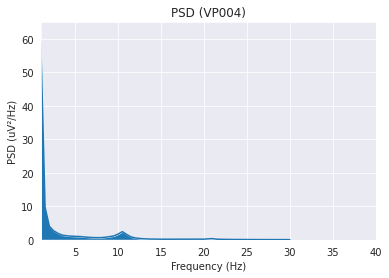

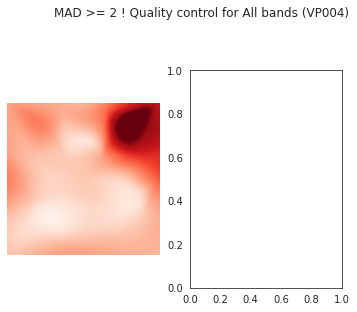

In [52]:
clean_data_dir = "/content/drive/My Drive/drdo/cleanData"
read_datasetA(clean_data_dir)

In [47]:
def read_datasetA(subjectPath):
    
    try:
        root, dirs, files = next(os.walk(clean_data_dir))
        
        for folder_name in dirs:
          path_file_fif1 = subjectPath + '/' + folder_name + '/nback1.fif'
          spectral_analysis_A(path_file_fif1, folder_name,'nback1')

          path_file_fif2 = subjectPath + '/' + folder_name + '/nback2.fif'
          spectral_analysis_A(path_file_fif1, folder_name,'nback2')

          path_file_fif3 = subjectPath + '/' + folder_name + '/nback3.fif'
          spectral_analysis_A(path_file_fif1, folder_name,'nback3')
            
    except StopIteration:
        pass
        print("Error ocurred:")
        print("Directory with dataset does not found!")
        print("Program will be terminated")
        exit(1)


In [46]:


def spectral_analysis_A(file_path, subject_name, sesssion_name):
  # Read the clean data from the disk
  epochs = mne.read_epochs(fname=file_path,verbose=False)
  print('epochs >>>>>>>>>>>>>>>>>>>>>>')
    
  # Calculate Welch's power spectrum density (FFT)
  [psds,freqs] = calculate_psd(epochs,subject_name,fminmax=[1,30],window='hamming',window_duration=2,window_overlap=0.5)
  print("psds >>>>>>>>>>>>>>>>>>>>>")
  print(psds)
  print("freqs >>>>>>>>>>>>>>>>>>>>>>>>>>")
  print(freqs)

  # Total PSD of chosen frequency range (for later relative PSD calculation)
  psd_ch_allbands = bandpower_per_channel(psds,freqs,[b_freqs[0][0],b_freqs[-1][-1]],'All bands',subject_name,epochs)
  print("psd_ch_allbands >>>>>>>>>>>>>>>>>>>>>>>>.")
  print(psd_ch_allbands)
  # Find power for all bands and add to dataframe including the previous subjects
  vmin = float('inf')
  vmax = 0
  for j in range(len(b_names)):
    # if i == 0:
    #   globals()["df_psd_"+b_names[j]] = pd.DataFrame()
    #   globals()["df_rel_psd_"+b_names[j]] = pd.DataFrame()
        
    # Devide the PSD to frequency band bins and calculate absolute and relative bandpowers
    globals()["psd_ch_"+b_names[j]] = bandpower_per_channel(psds,freqs,b_freqs[j],b_names[j],subject_name,epochs)
    globals()["rel_psd_ch_"+b_names[j]] = globals()["psd_ch_"+b_names[j]] / psd_ch_allbands

    # Convert the array to dataframe and concatenate it to dataframe including the previous subjects
    globals()["temp_df_psd_"+b_names[j]] = array_to_df(subject_name,epochs,globals()["psd_ch_"+b_names[j]])
    globals()["df_psd_"+b_names[j]] = pd.concat([globals()["df_psd_"+b_names[j]],globals()["temp_df_psd_"+b_names[j]]])
    globals()["temp_df_rel_psd_"+b_names[j]] = array_to_df(subject_name,epochs,globals()["rel_psd_ch_"+b_names[j]])
    globals()["df_rel_psd_"+b_names[j]] = pd.concat([globals()["df_rel_psd_"+b_names[j]],globals()["temp_df_rel_psd_"+b_names[j]]])

    # Save the minimum and maximum PSD values as an integer for later colorbar use
    vmin = min([vmin,min(globals()["psd_ch_"+b_names[j]])])
    vmax = max([vmax,max(globals()["psd_ch_"+b_names[j]])])

    # Plot topomaps for all bands
    sns.set_style("white",{'font.family': ['sans-serif']})
    fig,axs = plt.subplots(nrows=1,ncols=len(b_names),figsize=(10,3))
    fig.suptitle("Frequency topomaps ({})".format(subject_name))
    for topo in range(len(b_names)):
        im,_ = mne.viz.plot_topomap(globals()["psd_ch_"+b_names[topo]],epochs.info,axes=axs[topo],vmin=vmin,vmax=vmax,show=False)
        axs[topo].set_title(b_names[topo]+'\n'+str(b_freqs[topo]))
    cbar_ax = fig.add_axes([0.95,0.35,0.04,0.4])
    clb = fig.colorbar(im, cax=cbar_ax)
    clb.ax.set_ylabel('uV\u00b2/Hz')
    # Calculate alpha asymmetry for three channel pairs
    df_faa['Pre-frontal'] = calculate_asymmetry_ch(df_psd_Alpha,'Fp1','Fp2')
    df_faa['Mid-frontal'] = calculate_asymmetry_ch(df_psd_Alpha,'F3','F4')
    df_faa['Lateral-frontal'] = calculate_asymmetry_ch(df_psd_Alpha,'F7','F8')

    # Pre-create results folders for spectral analysis data
    create_results_folders(exp_folder=exp_folder,results_foldername=results_foldername)

    # Export asymmetry data
    df_faa.to_excel(r"{}/Absolute PSD/{}_frontal_asymmetry.xlsx".format(results_foldername,exp_condition))

    # Export power spectra data for each band
    for band in b_names:
      export_psd_results(globals()["df_psd_"+band],globals()["df_rel_psd_"+band],exp_folder,exp_condition,band,brain_regions,results_foldername=results_foldername)



In [45]:
# ========== Packages ==========
import mne
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# ========== Functions ==========
def calculate_psd(epochs,subjectname,fminmax=[1,100],window='hamming',window_duration=2,window_overlap=0.5,plot=True):
    """
    Calculate power spectrum density with FFT/Welch's method and plot the result.
    Parameters
    ----------
    epochs: Epochs-type (MNE-Python) EEG file
    subjectname: A string for subject's name
    fminmax (optional): The minimum and maximum frequency range for estimating Welch's PSD
    window (optional): The window type for estimating Welch's PSD
    window_duration (optional): An integer for the length of that window
    window_overlap (optional): A float for the percentage of overlap between the windows
    Returns
    -------
    psds: An array for power spectrum density values
    freqs: An array for the corresponding frequencies
    """
    # Calculate PSD with Welch's method
    window_size = int(epochs.info['sfreq']*window_duration)
    psds, freqs = mne.time_frequency.psd_welch(epochs,n_fft=window_size,verbose=False,
                                               n_overlap=int(window_size*window_overlap),
                                               fmin=fminmax[0],fmax=fminmax[1],window=window)

    # Unit conversion from V^2/Hz to uV^2/Hz
    psds = psds*1e12

    if plot == True:
        # Plot average PSD for all epochs and channels (only for plot)
        psds_mean_all = psds.mean(axis=(0, 1))

        sns.set_style("darkgrid",{'font.family': ['sans-serif']})
        plt.figure()
        plt.plot(freqs,psds_mean_all)
        plt.fill_between(freqs,psds_mean_all)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('PSD (uV\u00b2/Hz)')
        plt.title("PSD ({})".format(subjectname))
        plt.xlim(1,40)
        plt.ylim(0,1.1*max(psds_mean_all))

    return [psds,freqs]

def siqnal_quality_check(psds,freqs,band,b_name,subjectname,epochs):
    """
    Plot topographically PSD values and calculate median absolute deviation
    for the first and second half of the signal for signal reliability control.
    Parameters
    ----------
    psds: An array for power spectrum density values
    freqs: An array for corresponding frequencies
    band: A list of lower and higher frequency for the frequency band in interest
    b_name: A string for frequency band in interest
    subjectname: A string for subject's name
    epochs: Epochs-type (MNE-Python) EEG file
    Returns
    -------
    psd_max_mad_error: A float for max median absolute deviation for PSD values
    """

    print("siqnal_quality_check >>>>>>>>>>>>>")
    # Divide the epochs into two
    idx_mid_epoch = round(len(psds[:,0,0])/2)
    psds_p1 = psds[:idx_mid_epoch,:,:]
    psds_p2 = psds[idx_mid_epoch:,:,:]

    # Define the bandpower indices
    low, high = band
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Get only the bandpower values that we need for both parts
    psd_band_ch_p1 = psds_p1[:,:,idx_band]
    psd_band_mean_epochs_p1 = psd_band_ch_p1.mean(axis=(2))
    psd_band_ch_p2 = psds_p2[:,:,idx_band]
    psd_band_mean_epochs_p2 = psd_band_ch_p2.mean(axis=(2))

    # Find Median Absolute Deviation along all the epochs for each channel
    psd_band_mean_epochs = np.concatenate((psd_band_mean_epochs_p1, psd_band_mean_epochs_p2))
    psd_median = np.median(psd_band_mean_epochs,axis=0)
    psd_mad = stats.median_abs_deviation(psd_band_mean_epochs,axis=0)

    # For each epoch in all channels, calculate the Z-score (MAD error) using median and MAD
    psd_mad_error_epochs_per_ch_p1 = np.zeros(shape=psd_band_mean_epochs_p1.shape)
    psd_mad_error_epochs_per_ch_p2 = np.zeros(shape=psd_band_mean_epochs_p2.shape)
    for i in range(len(psds[0,:,0])):
        psd_mad_error_epochs_per_ch_p1[:,i] = abs(psd_band_mean_epochs_p1[:,i] - psd_median[i])/psd_mad[i]
        psd_mad_error_epochs_per_ch_p2[:,i] = abs(psd_band_mean_epochs_p2[:,i] - psd_median[i])/psd_mad[i]

    # Average the Z-scores (MAD errors) for all epochs for the two parts -> get score for 19 channels
    psd_mad_error_per_ch_p1 = np.mean(psd_mad_error_epochs_per_ch_p1,axis=0)
    psd_mad_error_per_ch_p2 = np.mean(psd_mad_error_epochs_per_ch_p2,axis=0)

    # Find the average Z-score (MAD error) for the whole scalp (all channels together) for the two parts
    psd_mad_error_avg = [np.round(np.mean(psd_mad_error_per_ch_p1),3),
                         np.round(np.mean(psd_mad_error_per_ch_p2),3)]
    
    # Get the maximum of the two (for outputting it later)
    psd_max_mad_error = np.max(psd_mad_error_avg)

    # Find the average PSD values for each channel for both parts
    psds_all_channels_p1 = psds_p1.mean(axis=(0))
    psd_band_ch_p1 = psds_all_channels_p1[:,idx_band]
    psd_band_mean_ch_p1 = psd_band_ch_p1.mean(axis=(1))
    psds_all_channels_p2 = psds_p2.mean(axis=(0))
    psd_band_ch_p2 = psds_all_channels_p2[:,idx_band]
    psd_band_mean_ch_p2 = psd_band_ch_p2.mean(axis=(1))

    print("avg find successfully")
    
    # Visually display the bandpower for both parts for visual inspection
    vmin = min([min(psd_band_mean_ch_p1),min(psd_band_mean_ch_p2)])
    vmax = max([max(psd_band_mean_ch_p1),max(psd_band_mean_ch_p2)])
    print("vmin >>>>>>>>>>>>>>>")
    print(vmin)
    print("psd_max_mad_error >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print(psd_max_mad_error)

    if psd_max_mad_error >= 2:
        sns.set_style("white",{'font.family': ['sans-serif']})
        fig,(ax1,ax2) = plt.subplots(ncols=2)
        print("plot 1 >>>>>>>>>>>>>>>>>")
        fig.suptitle("MAD >= 2 ! Quality control for {} ({})".format(b_name,subjectname),y=1.1,x=0.575)
        print("1 >>>>>>>>>>>>>>>>>>>>>>>>>>>")
        im,cm = mne.viz.plot_topomap(psd_band_mean_ch_p1,epochs.info,axes=ax1,vlim=[vmin,vmax],show=False)
        print("im cm")
        print(im)
        print("cm >>>>>>>>>>>>>>>>>>>>>>>>")
        print(cm)
        im,cm = mne.viz.plot_topomap(psd_band_mean_ch_p2,epochs.info,axes=ax2,vlim=[vmin,vmax],show=False)
        ax1.set_title("Epochs 0-{}\nAvg MAD error = {}".format(idx_mid_epoch-1,psd_mad_error_avg[0]))
        ax2.set_title("Epochs {}-{}\nAvg MAD error = {}".format(idx_mid_epoch,len(psds[:,0,0]),psd_mad_error_avg[1]))
        ax_x_start = 0.95
        ax_x_width = 0.04
        ax_y_start = 0.1
        ax_y_height = 0.9
        cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
        clb = fig.colorbar(im, cax=cbar_ax)
        clb.ax.set_ylabel('uV\u00b2/Hz'); 

    return psd_max_mad_error

def bandpower_per_channel(psds,freqs,band,b_name,subjectname,epochs,ln_normalization=False):
    """
    Find frequency band power in interest for all the channels.
    Parameters
    ----------
    psds: An array for power spectrum density values
    freqs: An array for corresponding frequencies
    band: A list of lower and higher frequency for the frequency band in interest
    b_name: A string for frequency band in interest
    subjectname: A string for subject's name
    epochs: Epochs-type (MNE-Python) EEG file
    Returns
    -------
    psd_band_mean_ch: An array for a frequency band power values for all the channels.
    """
    print("bandpower_per_channel called >>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    # Calculate the MAD error (z-score) of the bandpower to be sure of the quality
    psd_max_mad_error = siqnal_quality_check(psds,freqs,band,b_name,subjectname,epochs)
    print("psd_max_mad_error >>>>>>>>>>>>")
    print(psd_max_mad_error)
    
    low, high = band
    psds_all_channels = psds.mean(axis=(0))
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    psd_band_ch = psds_all_channels[:,idx_band]
    psd_band_mean_ch = psd_band_ch.mean(axis=(1))

    #print(band,'before norm',psd_band_mean_ch)
    if ln_normalization == True:
        psd_band_mean_ch = np.log(psd_band_mean_ch)

    #print(band,'after norm',psd_band_mean_ch)
    # # If the error is larger than 2, print it as a result (visual inspection)
    # if psd_max_mad_error < 2:
    #     print(subjectname,b_name,"MAD error is OK:",psd_max_mad_error)
    # else:
    #     print(subjectname,b_name,"MAD error is NOT OK:",psd_max_mad_error)

    print("psd_band_mean_ch >>>>>>>>>>>>>>>>>>>>>>>")
    print(psd_band_mean_ch)

    return psd_band_mean_ch

def calculate_asymmetry_ch(df_psd_band,left_ch,right_ch):
    """
    Calculate asymmetry between brain hemispheres.
    Parameters
    ----------
    df_psd_band: A dataframe with PSD values (for each region/channel) per subject for one band
    left_ch: A string for the left channel (or region)
    right_ch: A string for the right channel (or region)
    Returns
    -------
    df_asymmetry: A dataframe for calculated asymmetry for all the subjects
    """
    df_asymmetry = (df_psd_band[left_ch] - df_psd_band[right_ch])/(df_psd_band[left_ch] + df_psd_band[right_ch])*100
    return df_asymmetry

In [13]:
# ========== Packages ==========
import os
import pandas as pd

# ========== Functions ==========
def read_files(dir_inprogress,filetype,exclude_subjects=None,verbose=True):
    """
    Get all the (EEG) file directories and subject names.
    Parameters
    ----------
    dir_inprogress: A string with directory to look for files
    filetype: A string with the ending of the files we are looking for (e.g. '.bdf')
    Returns
    -------
    file_dirs: A list of strings with file directories for all the (EEG) files
    subject_names: A list of strings with all the corresponding subject names
    """
    file_dirs = []
    subject_names = []
    for file in os.listdir(dir_inprogress):
        if file.endswith(filetype):
            file_dirs.append(os.path.join(dir_inprogress, file))
            subject_names.append(os.path.join(file).removesuffix(filetype))

    for excl_sub in exclude_subjects:
        for i in range(len(subject_names)):
            if excl_sub in subject_names[i]:
                if verbose == True:
                    print('EXCLUDED SUBJECT: ',excl_sub,'in',subject_names[i],'at',file_dirs[i])
                del subject_names[i]
                del file_dirs[i]
                break

    if verbose == True:
        print("Files in folder read in:",len(file_dirs))

    return [file_dirs, subject_names]

def array_to_df(subjectname,epochs,array_channels):
    """
    Convert channel-based array to Pandas dataframe with channels' and subjects' names.
    Parameters
    ----------
    subjectname: A string for subject's name
    epochs: Epochs-type (MNE-Python) EEG file
    array_channels: An array with values for each channel
    Returns
    -------
    df_channels: A dataframe with values for each channel
    """
    df_channels = pd.DataFrame(array_channels).T
    df_channels.columns = epochs.info.ch_names
    df_channels['Subject'] = subjectname
    df_channels.set_index('Subject', inplace=True)

    return df_channels

def df_channels_to_regions(df_psd_band,brain_regions):
    """
    Average channels together based on the defined brain regions.
    Parameters
    ----------
    df_psd_band: A dataframe with PSD values for each channel per subject
    brain_regions: A dictionary of brain regions and EEG channels which they contain
    Returns
    -------
    df_psd_reg_band: A dataframe with PSD values for each brain region per subject
    """
    df_psd_reg_band = pd.DataFrame()
    for reg_name in brain_regions:
        df_temp = df_psd_band[brain_regions[reg_name]].copy().mean(axis=1)
        df_psd_reg_band = pd.concat([df_psd_reg_band,df_temp],axis=1)
        
    df_psd_reg_band.columns = brain_regions.keys()
    df_psd_reg_band.index.name = 'Subject'

    return df_psd_reg_band

def read_excel_psd(exp_folder,psd_folder,verbose=True):
    """
    Get all PSD file directories and corresponding bands and experiment conditions.
    Parameters
    ----------
    exp_folder: A string with a relative directory to experiment folder (e.g. 'Eyes Closed\Baseline')
    psd_folder: A string with a relative directory to the results folder (e.g. 'Results\PSD\regions')
    Returns
    -------
    dir_inprogress: A string with directory to look for files
    b_names: A list of strings for frequency bands of the files
    condition: A list of strings for experiment conditions of the files
    """
    dir_inprogress = os.path.join(psd_folder,exp_folder)
    _, b_names = read_files(dir_inprogress,".xlsx",verbose=verbose)

    condition = [None]*len(b_names)
    for i in range(len(b_names)):
        condition[i] = b_names[i].split("_psd_", 1)
    
    return [dir_inprogress,b_names,condition]

def create_results_folders(exp_folder,results_foldername="Results"):
    """
    Dummy way to try to pre-create folders for PSD results before exporting them
    Parameters
    ----------
    exp_folder: A string with a relative directory to experiment folder (e.g. 'Eyes Closed\Baseline')
    """
    try:
        os.makedirs(os.path.join(r"{}/Absolute PSD/channels".format(results_foldername),exp_folder))
    except FileExistsError:
        pass
    try:
        os.makedirs(os.path.join(r"{}/Absolute PSD/regions".format(results_foldername),exp_folder))
    except FileExistsError:
        pass
    try:
        os.makedirs(os.path.join(r"{}/Relative PSD/channels".format(results_foldername),exp_folder))
    except FileExistsError:
        pass
    try:
        os.makedirs(os.path.join(r"{}/Relative PSD/regions".format(results_foldername),exp_folder))
    except FileExistsError:
        pass
    try:
        os.makedirs(os.path.join(r"{}/FOOOF".format(results_foldername),exp_folder))
    except FileExistsError:
        pass

def export_psd_results(df_psd_band,df_rel_psd_band,exp_folder,exp_condition,band,brain_regions,results_foldername='Results'):
    """
    Export PSD results (for channels & regions) as Excel files
    Parameters
    ----------
    df_psd_band: A dataframe with PSD values for each channel per subject
    df_rel_psd_band: A dataframe with relative PSD values for each channel per subject
    exp_folder: A string with a relative directory to experiment folder (e.g. 'Eyes Closed\Baseline')
    exp_condition: A string for experiment short code (e.g. 'EC_00')
    band: The frequency band of the PSD values (e.g. 'Alpha')
    brain_regions: A dictionary of brain regions and EEG channels which they contain
    """
    # Save the PSD values for each channel for each band in Excel format
    df_psd_band.to_excel(r"{}/Absolute PSD/channels/{}/{}_psd_{}.xlsx".format(results_foldername,exp_folder,exp_condition,band))
    df_rel_psd_band.to_excel(r"{}/Relative PSD/channels/{}/{}_rel_psd_{}.xlsx".format(results_foldername,exp_folder,exp_condition,band))

    # Find regional band powers and save them to Excel as well
    df_psd_band_reg = df_channels_to_regions(df_psd_band,brain_regions)
    df_psd_band_reg.to_excel(r"{}/Absolute PSD/regions/{}/{}_psd_{}.xlsx".format(results_foldername,exp_folder,exp_condition,band))
    df_rel_psd_band_reg = df_channels_to_regions(df_rel_psd_band,brain_regions)
    df_rel_psd_band_reg.to_excel(r"{}/Relative PSD/regions/{}/{}_rel_psd_{}.xlsx".format(results_foldername,exp_folder,exp_condition,band))